# dogs vs cats dataset

In [1]:
# 파일 확인 (ls 명령어 사용)
%%bash

ls -l drive/MyDrive/Colab\ Notebooks/data_files

total 831648
-rw------- 1 root root     30286 May 22  2023 auto-mpg.data
-rw------- 1 root root 851576689 Dec 11 02:54 dogs-vs-cats.zip


In [2]:
# 파일 이동 (google drive -> sample_data)
%%bash

cp drive/MyDrive/Colab\ Notebooks/data_files/dogs-vs-cats.zip sample_data/

In [3]:
# 압축 풀기
# unzip(풀어야하는 파일 설정) sample_data/dogs-vs-cats.zip -d(어디에 풀지 결정) sample_data/
%%bash

# 폴더 생성
mkdir smaple_data/dogs-vs-cats
# 생성된 폴더에 압축 풀기
unzip sample_data/dogs-vs-cats.zip -d sample_data/dogs-vs-cats

Archive:  sample_data/dogs-vs-cats.zip
  inflating: sample_data/dogs-vs-cats/sampleSubmission.csv  
  inflating: sample_data/dogs-vs-cats/test1.zip  
  inflating: sample_data/dogs-vs-cats/train.zip  


mkdir: cannot create directory ‘smaple_data/dogs-vs-cats’: No such file or directory


In [16]:
# 압축 풀기 2 (하위 폴더의 train.zip, test1.zip 파일 압축 해제)

%%bash

# mkdir sample_data/dogs-vs-cats/train
# unzip sample_data/dogs-vs-cats/train.zip -d sample_data/dogs-vs-cats
# mkdir sample_data/dogs-vs-cats/test
# unzip sample_data/dogs-vs-cats/test1.zip -d sample_data/dogs-vs-cats

# 폴더 이름 변경
mv sample_data/dogs-vs-cats/test1 sample_data/dogs-vs-cats/test

In [15]:
%%bash
ls -l sample_data/dogs-vs-cats

total 834988
-rw-r--r-- 1 root root     88903 Dec 11  2019 sampleSubmission.csv
drwxr-xr-x 2 root root    278528 Sep 20  2013 test1
-rw-r--r-- 1 root root 284321224 Dec 11  2019 test1.zip
drwxr-xr-x 2 root root    774144 Dec 11 04:42 train
-rw-r--r-- 1 root root 569546721 Dec 11  2019 train.zip


In [1]:
# 위 작업 일괄 처리 (파일 압축 해제)
%%bash

# 폴더 지우기
# rm -rf sample_data/dogs-vs-cats
# 폴더 복사
cp drive/MyDrive/Colab\ Notebooks/data_files/dogs-vs-cats.zip sample_data/
# 폴더 생성
mkdir smaple_data/dogs-vs-cats
# 생성된 폴더에 압축 풀기 1
unzip sample_data/dogs-vs-cats.zip -d sample_data/dogs-vs-cats
# 압축 풀기 2
mkdir sample_data/dogs-vs-cats/train
unzip sample_data/dogs-vs-cats/train.zip -d sample_data/dogs-vs-cats
# train 폴더 안에 사진 들어감
mkdir sample_data/dogs-vs-cats/test1
unzip sample_data/dogs-vs-cats/test1.zip -d sample_data/dogs-vs-cats
# test 폴더 안에 test1 폴더 안에 사진 들어감

# 폴더 이름 변경
mv sample_data/dogs-vs-cats/test1 sample_data/dogs-vs-cats/test

Output hidden; open in https://colab.research.google.com to view.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 데이터 디렉터리 구성
# train_dir, test_dir, validation_dir # 훈련, 테스트, 검증 세트 폴더
# train_dir -> cats, dogs             # 범주로 사용될 폴더
# test_dir -> cats, dogs
# validation_dir -> cats, dogs

import os, shutil

src_base = 'sample_data/dogs-vs-cats'
dest_base = 'sample_data/dogs-vs-cats2'

if os.path.exists(dest_base): # 이미 존재하는 폴더라면
  shutil.rmtree(dest_base)    # 폴더 제거 후
os.makedirs(dest_base)        # 새로 폴더 만들기

# 범주를 말할때 앞 숫자는 포함, 뒤 숫자는 불포함
# train 폴더의 0 ~ 1000 : trainset, 1000 ~ 1500 : validationset, 1500 ~ 2000 : testset
# > 0 ~ 999, 1500 ~ 1499, 1500 ~ 1999
# zip을 3개로 걸음. 시작 숫자, 끝 숫자, 들어갈 곳
# > 0 ~ 1000 : train, 1000 ~ 1500 : validation, 1500 ~ 2000 : test 폴더 생성
for start, stop, path in zip([0, 1000, 1500], [1000, 1500, 2000], ['train', 'validation', 'test']):
  os.mkdir(os.path.join(dest_base, path)) # train or validation or test 폴더 생성
  for sub_path in ['cat', 'dog']:
    os.mkdir(os.path.join(dest_base, path, sub_path)) # train, validation, test 하위에 cat or dog 폴더 생성
    for idx in np.arange(start, stop):
      fname = f'{sub_path}.{idx}.jpg'   # ex) cat.1.jpg 를 위치에 맞게 저장
      shutil.copy(os.path.join(src_base, 'train', fname), os.path.join(dest_base, path, sub_path, fname))

In [5]:
# 디렉터리 구성 결과 확인
for path in ['train', 'test', 'validation']:
  for subpath in ['cat', 'dog']:
    print(path, '/', subpath, ':', len(os.listdir(f'sample_data/dogs-vs-cats2/{path}/{subpath}')))

train / cat : 1000
train / dog : 1000
test / cat : 500
test / dog : 500
validation / cat : 500
validation / dog : 500


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras

In [9]:
# 입력 자동화 도구 만들기
# ImageDataGenerator() 이미지를 읽어서 데이터로 만드는 도구

# 특정 디렉터리의 파일을 읽어서 모델의 입력 데이터로 변환하는 도구
train_generator = tf_keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
validation_generator = tf_keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_generator = tf_keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [10]:
# 입력 데이터 구성

datasets = []
for path, generator in zip(['train', 'validation', 'test'],
                           [train_generator, validation_generator, test_generator]):
  dataset = generator.flow_from_directory(directory = f'sample_data/dogs-vs-cats2/{path}',  # 디렉터리에서 알아서 이미지 가져오기
                                          target_size=(256, 256),                           # 이미지 사이즈 일괄 맞춤
                                          batch_size=32,                                    # 한 방에 처리할 이미지 수
                                          class_mode='binary')                              # 범주 몇개냐? binary : 이진분류
  datasets.append(dataset)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
print(type(datasets[0]))
for x_batch, y_batch in datasets[0]:
  print(x_batch.shape, y_batch.shape)
  print(x_batch[0].max())
  print(y_batch)
  break
# (32, 256, 256, 3) 32: 한 번에 뽑은 이미지 수, 256*256 가로*세로, 3 RGB 3개 채널

<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
(32, 256, 256, 3) (32,)
0.98823535
[1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 1.]


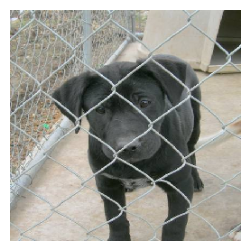

In [18]:
plt.figure(figsize=(3, 3))
plt.imshow(x_batch[4])
plt.axis('off')
plt.show()

In [19]:
# 모델 구조 설계

model = tf_keras.models.Sequential([
    tf_keras.layers.Input(shape=(256, 256, 3)),
    tf_keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),  # 256 256 32
    tf_keras.layers.MaxPooling2D((2, 2)),                                                       # 128 128 32
    tf_keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),  # 128 128 64
    tf_keras.layers.MaxPooling2D((2, 2)),                                                       # 64   64 64
    tf_keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'), # 64   64 128
    tf_keras.layers.MaxPooling2D((2, 2)),                                                       # 32   32 128

    tf_keras.layers.Flatten(),

    tf_keras.layers.Dense(units=512, activation='relu'),
    tf_keras.layers.Dense(units=256, activation='relu'),
    tf_keras.layers.Dense(units=1, activation='sigmoid')  # 2진 분류면 1, sigmoid 쓰거나, 2, softmax 사용
])

model.summary() # 가중치 수 : 67,334,209

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      67,109,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,334,209 (256.86 MB)

 Trainable params: 67,334,209 (256.86 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# 모델 훈련 설계
model.compile(loss='binary_crossentropy',   # activation : sigmoid 일때 loss = binary_crossentropy
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
# 모델 훈련

fit_history = model.fit(datasets[0],
                        steps_per_epoch=60, epochs=20,
                        validation_data=datasets[1], validation_steps=30)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 28s 300ms/step - accuracy: 0.5110 - loss: 1.2349 - val_accuracy: 0.6021 - val_loss: 0.6729
Epoch 2/20
 3/60 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.6094 - loss: 0.6772

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5945 - loss: 0.6817 - val_accuracy: 0.5500 - val_loss: 0.6906
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.5009 - loss: 0.6918 - val_accuracy: 0.5958 - val_loss: 0.6543
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6560 - loss: 0.6472 - val_accuracy: 0.4000 - val_loss: 0.7274
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.6089 - loss: 0.6582 - val_accuracy: 0.6187 - val_loss: 0.6485
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6046 - loss: 0.6381 - val_accuracy: 0.5500 - val_loss: 0.6935
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.6466 - loss: 0.6227 - val_accuracy: 0.6323 - val_loss: 0.6254
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6144 - loss: 0.5880 - val_accuracy: 0.6000 - val_loss: 0.6588
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.7221 - loss: 0.5298 - val_accuracy: 0.6573 - val_loss

In [24]:
print(model.evaluate(datasets[0]), model.evaluate(datasets[1]), model.evaluate(datasets[2]))

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9961 - loss: 0.0307
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.6965 - loss: 1.5070
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6668 - loss: 1.7988
[0.031244924291968346, 0.9950000047683716] [1.5264495611190796, 0.6790000200271606] [1.8152968883514404, 0.6639999747276306]


In [50]:
# 나 혼자 해보는 과대적합 개선

# 모델 구조 설계

model_y = tf_keras.models.Sequential([
    tf_keras.layers.Input(shape=(256, 256, 3)),
    tf_keras.layers.Conv2D(filters=4, kernel_size=(3, 3), padding='same', activation='relu'),
    tf_keras.layers.MaxPooling2D((2, 2)),
    tf_keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'),
    tf_keras.layers.MaxPooling2D((2, 2)),

    tf_keras.layers.Flatten(),

    tf_keras.layers.Dense(units=128),
    tf_keras.layers.BatchNormalization(),
    tf_keras.layers.Activation('relu'),
    tf_keras.layers.Dropout(0.5),

    tf_keras.layers.Dense(units=32),
    tf_keras.layers.BatchNormalization(),
    tf_keras.layers.Activation('relu'),
    tf_keras.layers.Dropout(0.5),

    tf_keras.layers.Dense(units=1, activation='sigmoid')  # 2진 분류면 1, sigmoid 쓰거나, 2, softmax 사용
])

model_y.summary() # 가중치 수 : 8,394,241

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)                   │ (None, 256, 256, 4)         │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 128, 128, 4)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 128, 128, 16)        │             592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,394,241 (32.02 MB)

 Trainable params: 8,393,921 (32.02 MB)

 Non-trainable params: 320 (1.25 KB)

In [51]:
# 모델 훈련 설계
model_y.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # 검증 손실을 기준으로
    patience=20,          # 5번 연속으로 개선되지 않으면 멈춤
    restore_best_weights=True  # 최적의 가중치를 복원
)

fit_history_y = model_y.fit(datasets[0],
                            steps_per_epoch=60, epochs=100,
                            validation_data=datasets[1], validation_steps=30,
                            callbacks=[early_stopping])

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 183ms/step - accuracy: 0.5202 - loss: 0.7939 - val_accuracy: 0.5312 - val_loss: 1.0426
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5535 - loss: 0.7930 - val_accuracy: 0.5500 - val_loss: 1.0854
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 115ms/step - accuracy: 0.5254 - loss: 0.7561 - val_accuracy: 0.5635 - val_loss: 0.6747
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6139 - loss: 0.7436 - val_accuracy: 0.6500 - val_loss: 0.6223
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.5950 - loss: 0.6714 - val_accuracy: 0.5833 - val_loss: 0.6603
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5829 - loss: 0.7071 - val_accuracy: 0.5750 - val_loss: 0.6722
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.6328 - loss: 0.6372 - val_accuracy: 0.5042 - val_loss: 0.7471
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6237 - loss: 0.6119 - val_accuracy:

In [53]:
print(model.evaluate(datasets[0], steps=60), model.evaluate(datasets[2], steps=30))
# train: 0.9947916865348816, test: 0.6604166626930237 : 과대 적합 상황
print(model_y.evaluate(datasets[0], steps=60), model_y.evaluate(datasets[2], steps=30))
# train: 0.8197916746139526, test: 0.675000011920929
# train: 0.9458333253860474, test: 0.640625
# train: 0.8989583253860474, test: 0.6416666507720947

60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.9954 - loss: 0.0295
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6849 - loss: 1.6768
[0.03137506544589996, 0.9947916865348816] [1.8086011409759521, 0.6666666865348816]
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9088 - loss: 0.4650
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.6614 - loss: 0.6328
[0.4699731469154358, 0.8989583253860474] [0.6392338871955872, 0.6416666507720947]
